In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

In [2]:
df = pd.read_csv('../heart_cleveland.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
X = df.drop('condition', axis = 1)
y = df['condition']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = model_dt.predict(X_test)

In [8]:
def explain_model(model,  X_train, X_test, y_train, y_test, features = None):
    print('Test Results:')
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))
    print('Train Results:')
    y_pred_tr = model.predict(X_train)
    print(classification_report(y_pred_tr, y_train))
    print(confusion_matrix(y_pred_tr, y_train))
    print('------------------')
    print('------------------')
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              filled=True,
              feature_names = features,
              class_names=True,
              rounded=True,
              fontsize=10)
    plt.title("Visualization", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

Test Results:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60

[[24  8]
 [ 8 20]]
Train Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237

[[128   0]
 [  0 109]]
------------------
------------------


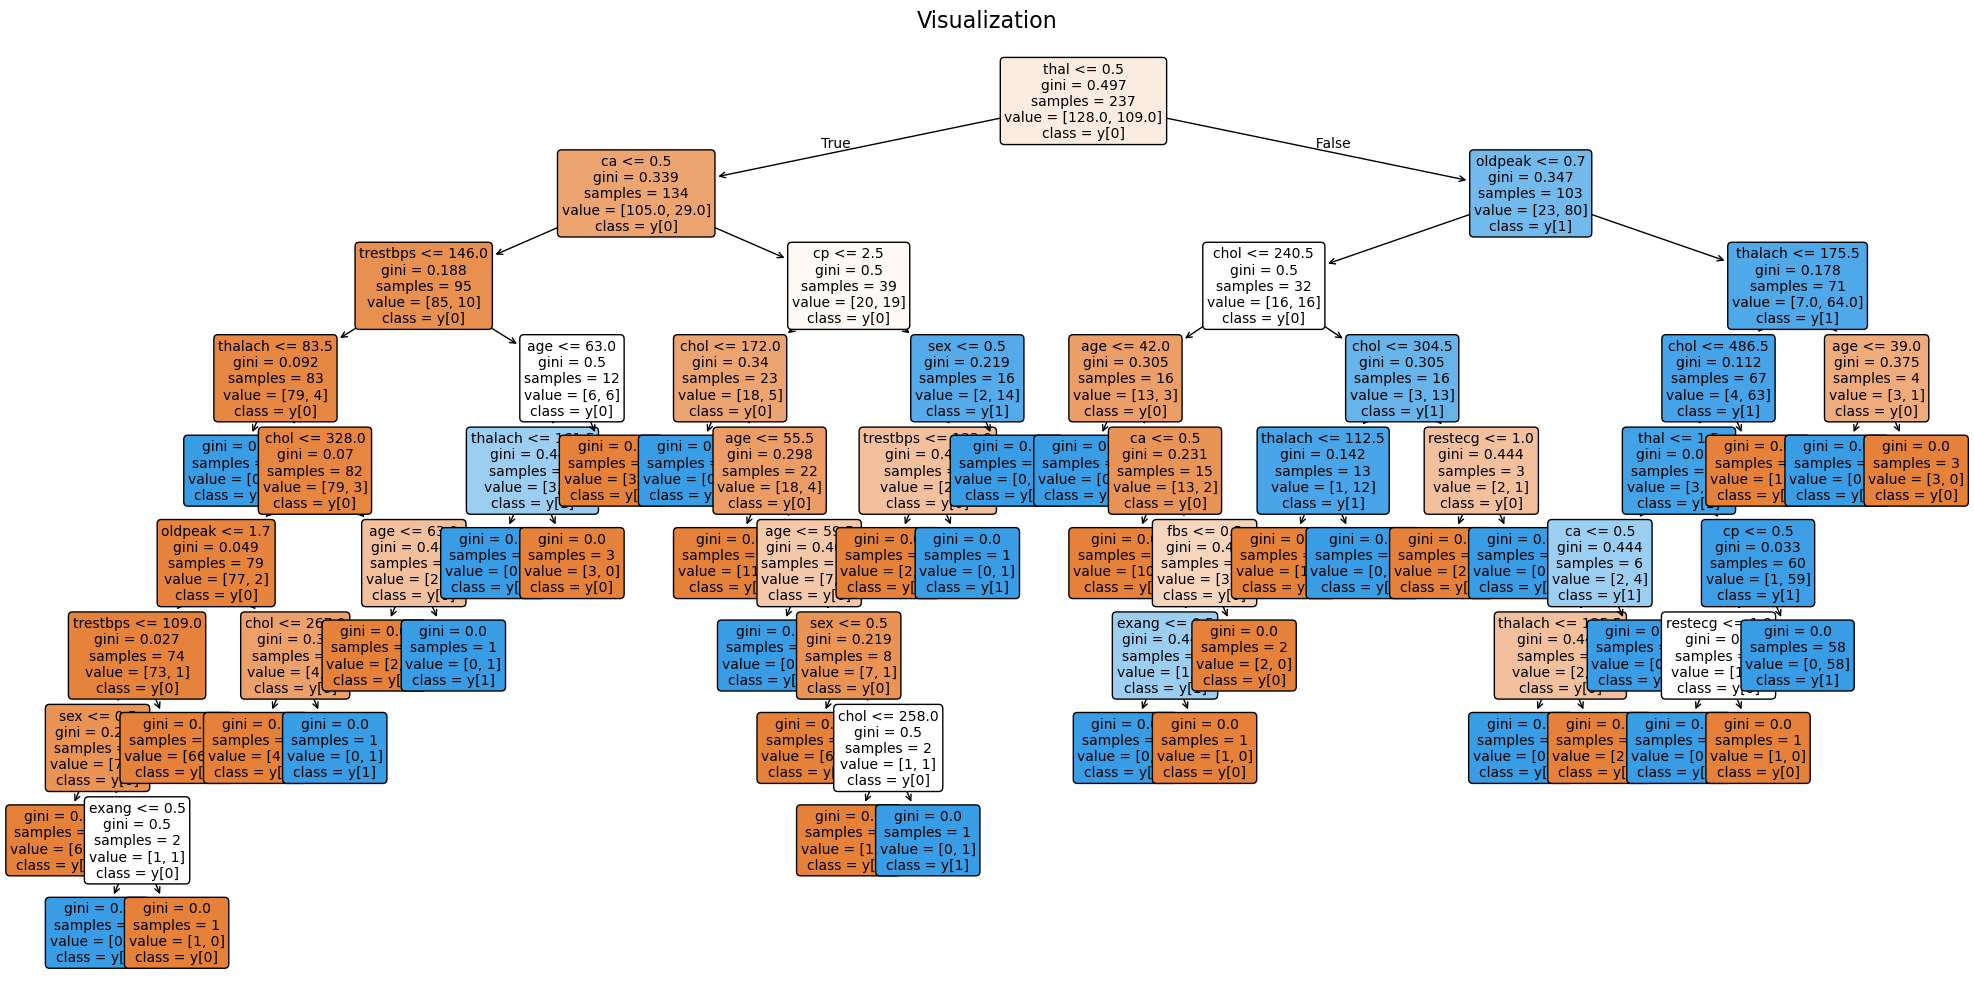

In [9]:
explain_model(model_dt, X_train, X_test, y_train, y_test, features = X_train.columns)

In [10]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": list(range(3, 8)),
    "min_samples_split": [2, 3, 4, 5, 7, 9, 10,13, 15, 17, 20],
    "min_samples_leaf": [ 2,3,4, 5,6 ,7 ,8 ,9, 10,12]
}

model = DecisionTreeClassifier()

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",   
    cv=5,
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                         'min_samples_split': [2, 3, 4, 5, 7, 9, 10, 13, 15, 17,
                                               20]},
             scoring='accuracy', verbose=1)

In [11]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [12]:
modelgs = DecisionTreeClassifier( **gs.best_params_)

In [13]:
modelgs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6)

Test Results:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.68      0.63      0.66        30

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60

[[21  9]
 [11 19]]
Train Results:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       133
           1       0.86      0.90      0.88       104

    accuracy                           0.89       237
   macro avg       0.89      0.90      0.89       237
weighted avg       0.90      0.89      0.89       237

[[118  15]
 [ 10  94]]
------------------
------------------


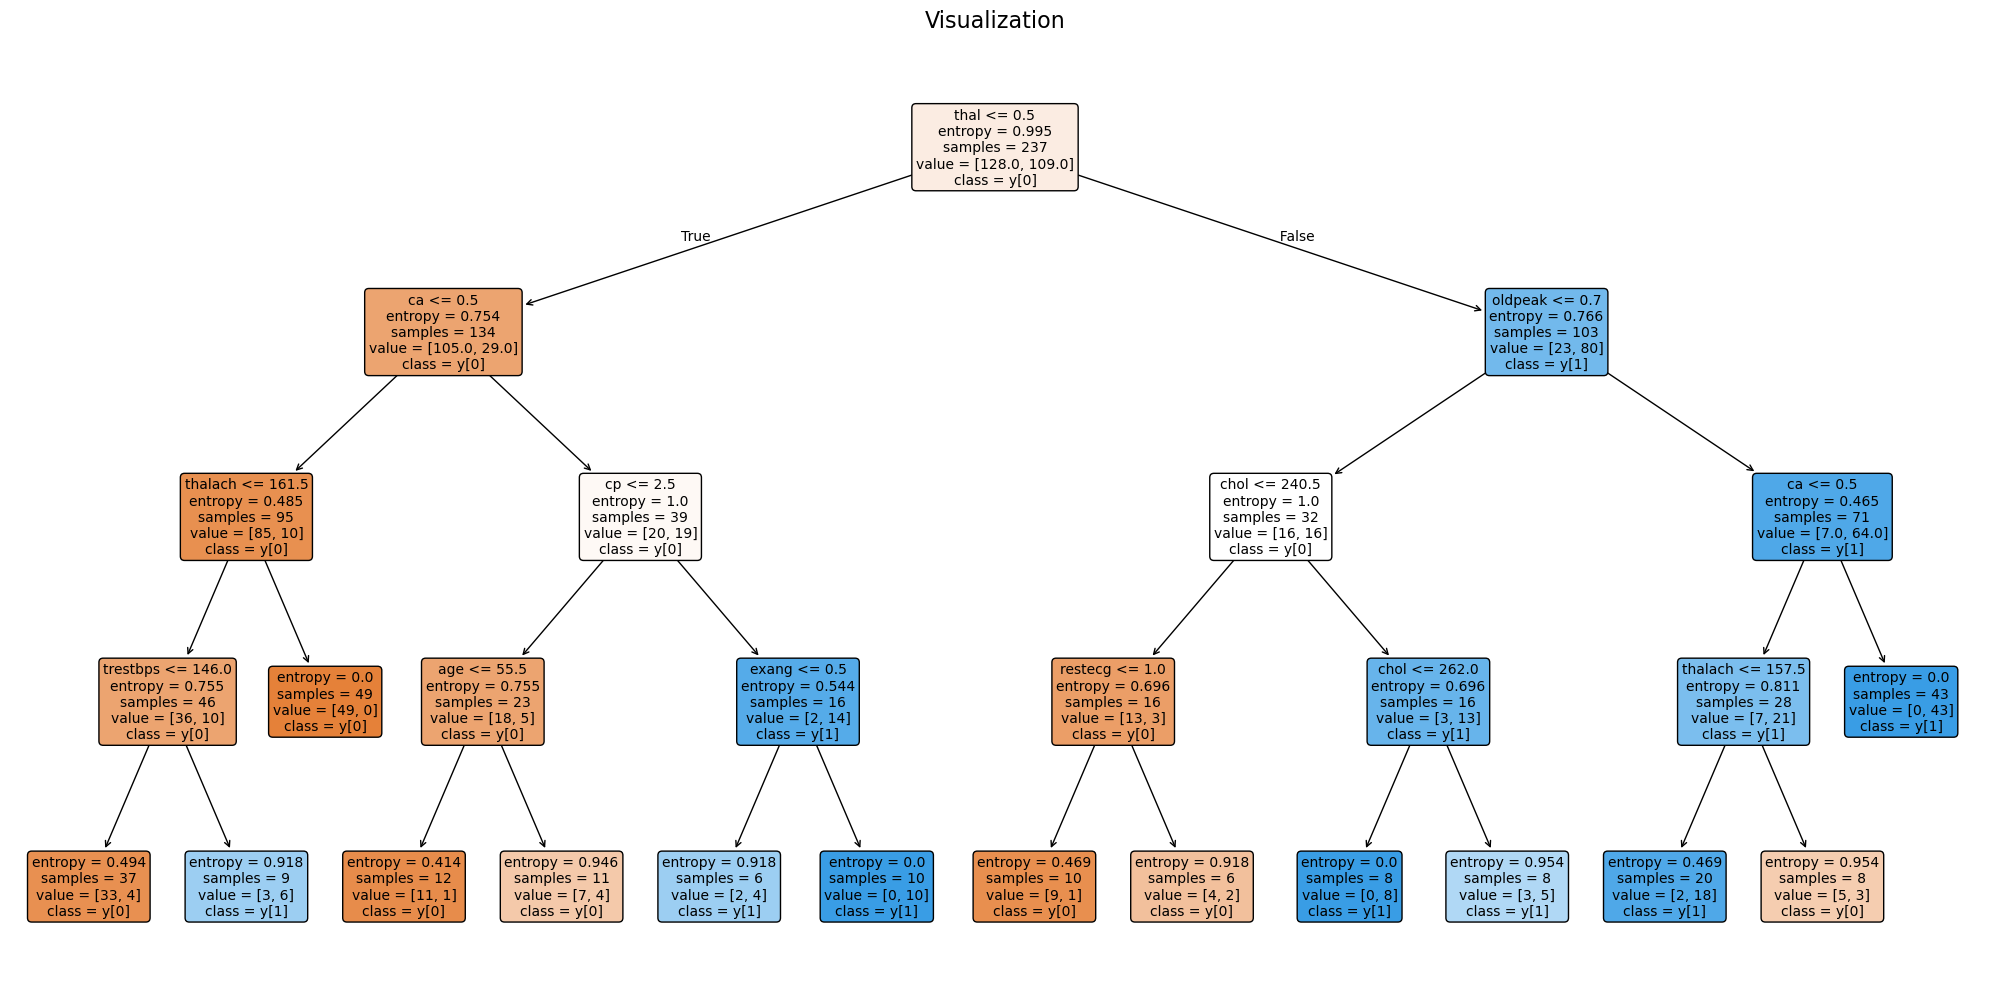

In [14]:
explain_model(modelgs, X_train, X_test, y_train, y_test, features = X_train.columns)

In [55]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": randint(1, 11),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(4, 15)
}

In [56]:
rs = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=150,             
    scoring="f1",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [57]:
rs.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000293A0220550>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002939F1AEFD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002939F1AF950>},
                   random_state=42, scoring='f1', verbose=1)

In [58]:
rs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 11,
 'min_samples_split': 6}

In [59]:
model_random= DecisionTreeClassifier(**rs.best_params_)

In [60]:
model_random.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=11, min_samples_split=6)

In [61]:
y_pred = model_random.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
accuracy

0.7166666666666667

Test Results:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.68      0.70      0.69        27

    accuracy                           0.72        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.72      0.72      0.72        60

[[24  9]
 [ 8 19]]
Train Results:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       134
           1       0.83      0.88      0.86       103

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.88      0.87      0.87       237

[[116  18]
 [ 12  91]]
------------------
------------------


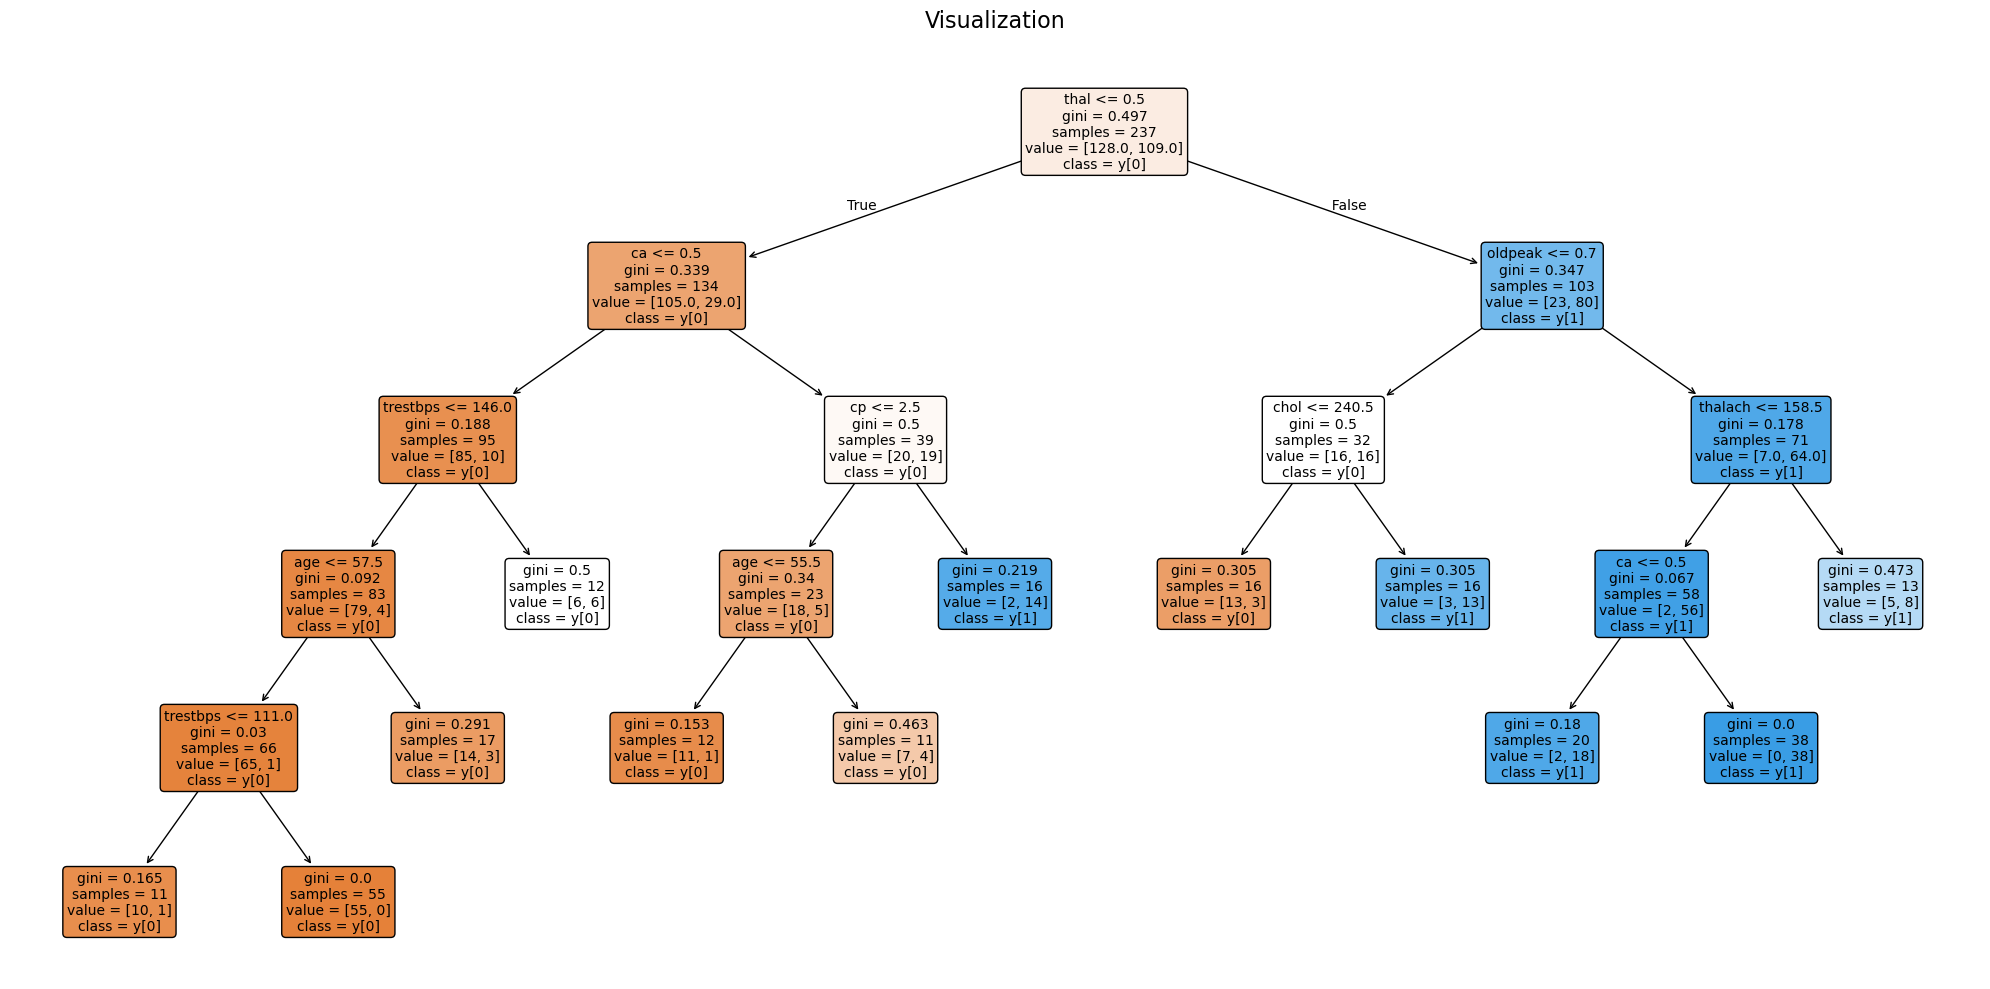

In [64]:
explain_model(model_random, X_train, X_test, y_train, y_test, features=X_train.columns)